In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir kaggle

In [ ]:
import os
import json 
kaggleAPIToken = {"username":"minhtbi","key":"5c090ffe0e6f413dc7d7d970d54b1f76"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(kaggleAPIToken, file)

In [ ]:
!chmod 600 /content/kaggle/kaggle.json
!sudo mkdir ~/.kaggle
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json
!mkdir dataset
!kaggle datasets download -d minhtbi/camxuc

 81% 49.0M/60.8M [00:01<00:00, 38.6MB/s]
100% 60.8M/60.8M [00:01<00:00, 54.0MB/s]


In [ ]:
!unzip /content/camxuc.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: camxuc/train/sad/Training_65242339.jpg  
  inflating: camxuc/train/sad/Training_65267116.jpg  
  inflating: camxuc/train/sad/Training_65275626.jpg  
  inflating: camxuc/train/sad/Training_6529266.jpg  
  inflating: camxuc/train/sad/Training_65329617.jpg  
  inflating: camxuc/train/sad/Training_65338712.jpg  
  inflating: camxuc/train/sad/Training_65338797.jpg  
  inflating: camxuc/train/sad/Training_65387162.jpg  
  inflating: camxuc/train/sad/Training_65404494.jpg  
  inflating: camxuc/train/sad/Training_65426218.jpg  
  inflating: camxuc/train/sad/Training_65430136.jpg  
  inflating: camxuc/train/sad/Training_65437377.jpg  
  inflating: camxuc/train/sad/Training_6545735.jpg  
  inflating: camxuc/train/sad/Training_65463385.jpg  
  inflating: camxuc/train/sad/Training_65473985.jpg  
  inflating: camxuc/train/sad/Training_65502829.jpg  
  inflating: camxuc/train/sad/Training_65505359.jpg  
  inflating: camxuc/train/s

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import itertools  
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from sklearn.metrics import confusion_matrix,classification_report
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
class_name = ['angry','disgust','fear','happy','neutral','sad','surprise']
path_train = '/content/camxuc/train/'
path_test = '/content/camxuc/test/'
target_name = {'angry': 0, 'disgust': 1,'fear': 2, 'happy': 3,'neutral':4,'sad': 5,'surprise':6}
X, y = [], []
for emotion in class_name:
    for img_name in os.listdir(path_train+emotion):
        img = cv2.imread(path_train + emotion +'/'+ img_name)
        scalled_raw_img = cv2.resize(img, (96, 96))
        X.append(scalled_raw_img)
        y.append(target_name[emotion])

for emotion in class_name:
    for img_name in os.listdir(path_test+emotion):
        img = cv2.imread(path_test + emotion +'/'+ img_name)
        scalled_raw_img = cv2.resize(img, (96, 96))
        X.append(scalled_raw_img)
        y.append(target_name[emotion])

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   validation_split = 0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = "/content/camxuc/train",
                                                    target_size = (96,96),
                                                    batch_size = 64,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    subset = "training")
validation_generator = validation_datagen.flow_from_directory( directory = "/content/camxuc/test",
                                                              target_size = (96,96),
                                                              batch_size = 64,
                                                              color_mode = "rgb",
                                                              class_mode = "categorical",
                                                              subset = "validation")

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(96,96,3)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(7, activation='softmax')])

In [ ]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 94, 94, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=8),
            ModelCheckpoint("Model_camxuc.h5",verbose= 1 ,save_best_only=True)]

In [ ]:
history = model.fit(train_generator,epochs = 50,validation_data = validation_generator,callbacks=my_calls)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 2.1089 - accuracy: 0.2421
Epoch 1: val_loss improved from inf to 11.67247, saving model to Model_camxuc.h5
359/359 [==============================] - 79s 184ms/step - loss: 2.1089 - accuracy: 0.2421 - val_loss: 11.6725 - val_accuracy: 0.2535
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 1.9115 - accuracy: 0.2925
Epoch 2: val_loss improved from 11.67247 to 1.69591, saving model to Model_camxuc.h5
359/359 [==============================] - 66s 184ms/step - loss: 1.9115 - accuracy: 0.2925 - val_loss: 1.6959 - val_accuracy: 0.3617
Epoch 3/50
359/359 [==============================] - ETA: 0s - loss: 1.8100 - accuracy: 0.3311
Epoch 3: val_loss improved from 1.69591 to 1.66675, saving model to Model_camxuc.h5
359/359 [==============================] - 64s 178ms/step - loss: 1.8100 - accuracy: 0.3311 - val_loss: 1.6667 - val_accuracy: 0.3631
Epoch 4/50
359/359 [==============================] - ETA: 

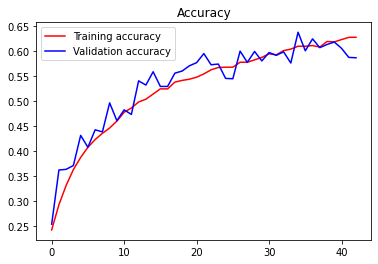

<Figure size 432x288 with 0 Axes>

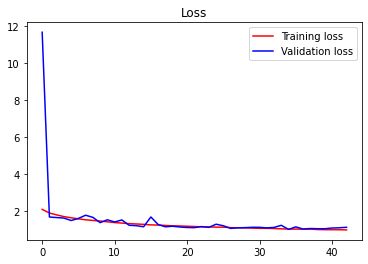

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(history.epoch, accuracy, 'r', label='Training accuracy')
plt.plot(history.epoch, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


plt.plot(history.epoch, loss, 'r', label='Training loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.legend(loc=0)
plt.show()

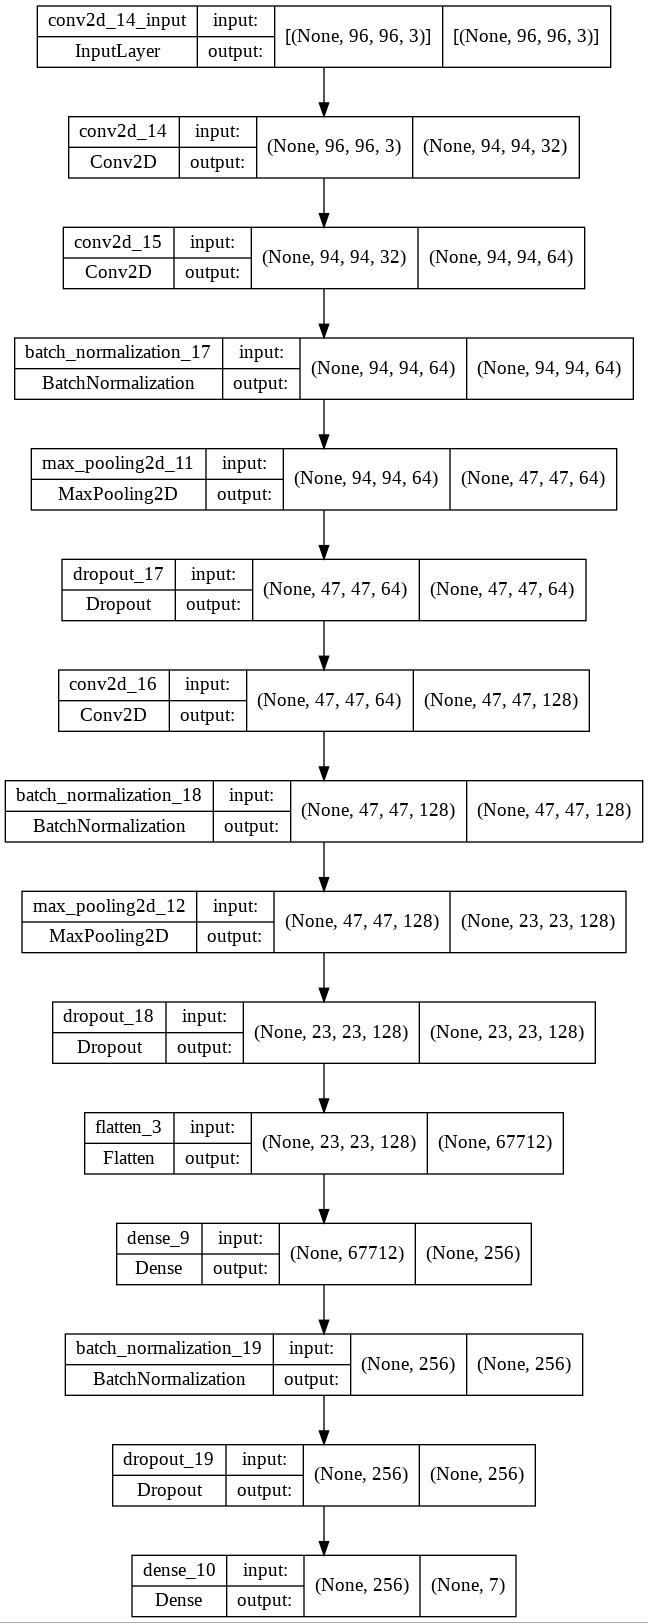

In [ ]:
tf.keras.utils.plot_model(model, 'model_camxuc.jpg', show_shapes=True)
